# Lesson 6 - Object Detection

# Object detection - Note.

The architecture we are going to use is called `RetinaNet`. I've exported this all myself for you guys to use quickly, if you want to explore what's going on in the code I'd recommend the Object Detection lesson [here](https://www.youtube.com/watch?v=Z0ssNAbe81M&t=4496s)

jeremy howard 2018 ..
https://www.youtube.com/watch?v=Z0ssNAbe81M&t=4496s


## Lesson Video:

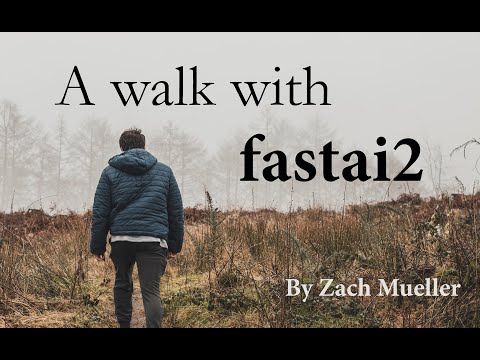

In [ ]:
#_hide_input
from IPython.lib.display import YouTubeVideo
from datetime import timedelta
start = int(timedelta(minutes=34, seconds=27).total_seconds())
YouTubeVideo('5bSVug1YB3s', start=start)

In [1]:
#_hide
#Run once per session
#!pip install fastai wwf -q --upgrade
#! pip install  fastbook
import fastbook
fastbook.setup_book()

Matplotlib is building the font cache; this may take a moment.
/opt/conda/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370156314/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [4]:
#!pip install fastai wwf -q 

In [2]:
#_hide_input
from fastbook import *
from wwf.utils import state_versions
state_versions(['fastai', 'fastcore', 'wwf'])


---
This article is also a Jupyter Notebook available to be run from the top down. There
will be code snippets that you can then run in any environment.

Below are the versions of `fastai`, `fastcore`, and `wwf` currently running at the time of writing this:
* `fastai` : 2.6.3 
* `fastcore` : 1.4.3 
* `wwf` : 0.0.16 
---

## Object Detection

Finding the localized area in which an object presides from two points, the bottom left and top right

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/06/maxresdefault.jpg)

In [3]:
from fastai.vision.all import *
!pwd

/acup


In [5]:
!pwd
path = untar_data(URLs.PASCAL_2007)

/acup


Now how do we get our labels? `fastai` has a `get_annotations` function that we can use to grab the image and their bounding box. The one-line documentation states:
"Open a COCO style json in `fname` and returns the list of filenames (with mabye `prefix`) and labelled bounding boxes."

In [6]:
path.ls()

(#8) [Path('/root/.fastai/data/pascal_2007/train'),Path('/root/.fastai/data/pascal_2007/segmentation'),Path('/root/.fastai/data/pascal_2007/train.json'),Path('/root/.fastai/data/pascal_2007/train.csv'),Path('/root/.fastai/data/pascal_2007/test.csv'),Path('/root/.fastai/data/pascal_2007/test.json'),Path('/root/.fastai/data/pascal_2007/test'),Path('/root/.fastai/data/pascal_2007/valid.json')]

In [7]:
%%bash -s $path
# get just a fractionof the 7k files...
ls  $1 | wc -l
mkdir -p /bb
#mv $1/* /bb
ls  $1 | wc -l
ls  /bb | wc -l
#find /bb -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 455 -z | xargs -0 cp -vt $1
ls  $1 | wc -l
ls -lsR  $1 | wc -l


8
8
0
8
10411


In [10]:
%%bash -s $path
cd $1;pwd;

mkdir -p 0train 0test
find train -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 1999 -z | xargs -0 mv -vt 0train
find test -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 1999 -z | xargs -0 mv -vt 0test
ls -lsR  train | wc -l
ls -lsR  test | wc -l

/root/.fastai/data/pascal_2007
renamed 'train/005590.jpg' -> '0train/005590.jpg'
renamed 'train/000268.jpg' -> '0train/000268.jpg'
renamed 'train/003412.jpg' -> '0train/003412.jpg'
renamed 'train/002502.jpg' -> '0train/002502.jpg'
renamed 'train/004558.jpg' -> '0train/004558.jpg'
renamed 'train/006107.jpg' -> '0train/006107.jpg'
renamed 'train/006284.jpg' -> '0train/006284.jpg'
renamed 'train/001266.jpg' -> '0train/001266.jpg'
renamed 'train/008628.jpg' -> '0train/008628.jpg'
renamed 'train/005515.jpg' -> '0train/005515.jpg'
renamed 'train/003397.jpg' -> '0train/003397.jpg'
renamed 'train/003717.jpg' -> '0train/003717.jpg'
renamed 'train/007275.jpg' -> '0train/007275.jpg'
renamed 'train/003618.jpg' -> '0train/003618.jpg'
renamed 'train/006236.jpg' -> '0train/006236.jpg'
renamed 'train/009325.jpg' -> '0train/009325.jpg'
renamed 'train/001174.jpg' -> '0train/001174.jpg'
renamed 'train/008477.jpg' -> '0train/008477.jpg'
renamed 'train/007191.jpg' -> '0train/007191.jpg'
renamed 'train/0009

In [23]:
%%bash -s $path
cd $1;pwd;

mkdir -p 0train 0test
mv 0train/* train/
mv 0test/* test/
#find train -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 1999 -z | xargs -0 mv -vt 0train
#find test -type f -name "*.jpg" -print0 | xargs -0 shuf -e -n 1999 -z | xargs -0 mv -vt 0test
ls -lsR  train | wc -l
ls -lsR  test | wc -l

/root/.fastai/data/pascal_2007
5020
4954


mv: cannot stat '0train/*': No such file or directory


In [11]:
%%bash -s $path
cd $1;pwd;

ls -lsR  train | wc -l
ls -lsR  test | wc -l

/root/.fastai/data/pascal_2007
1022
956


In [40]:
%%bash -s $path
echo $1
ls -laR $1

/root/.fastai/data/pascal_2007
/root/.fastai/data/pascal_2007:
total 6040
drwxrwxr-x 8 1002 1002   45056 Jun  1 02:17 .
drwxr-xr-x 7 root root    4096 Jun  1 01:50 ..
drwxr-xr-x 2 root root   36864 Jun  1 02:08 0more
drwxr-xr-x 2 root root  139264 Jun  1 02:27 0test
drwxr-xr-x 2 root root  139264 Jun  1 02:27 0train
drwxrwxr-x 2 1002 1002   20480 Jan 24  2020 segmentation
drwxrwxr-x 2 1002 1002  135168 Jun  1 02:27 test
-rw-rw-r-- 1 1002 1002  104372 Jan 23  2020 test.csv
-rw-r--r-- 1 1002 1002 2584743 Jul  7  2015 test.json
drwxrwxr-x 3 1002 1002  135168 Jun  1 02:27 train
-rw-rw-r-- 1 1002 1002  134683 Jan 23  2020 train.csv
-rw-r--r-- 1 1002 1002 1346236 Aug 19  2015 train.json
-rw-r--r-- 1 1002 1002 1342257 Jul  7  2015 valid.json

/root/.fastai/data/pascal_2007/0more:
total 80
drwxr-xr-x 2 root root 36864 Jun  1 02:08 .
drwxrwxr-x 8 1002 1002 45056 Jun  1 02:17 ..

/root/.fastai/data/pascal_2007/0test:
total 385372
drwxr-xr-x 2 root root 139264 Jun  1 02:27 .
drwxrwxr-x 8 1002 100

We'll want to read out of the `train.json`

In [12]:
imgs, lbl_bbox = get_annotations(path/'train.json')

In [13]:
imgs[0]

'000012.jpg'

In [14]:
lbl_bbox[0]

([[155, 96, 351, 270]], ['car'])

Next, we want to be able to quickly look up a corresponding image to it's label. We'll use a dictionary

In [15]:
img2bbox = dict(zip(imgs, lbl_bbox))

Let's check the first item

In [16]:
first = {k: img2bbox[k] for k in list(img2bbox)[:1]}; first

{'000012.jpg': ([[155, 96, 351, 270]], ['car'])}

Great! Now let's build our `DataBlock`. We'll have two outputs, the bounding box itself and a label, with one input.

In [17]:
getters = [lambda o: path/'train'/o, lambda o: img2bbox[o][0], lambda o: img2bbox[o][1]]

For our transforms, we'll use some of the ones we defined earlier

In [18]:
item_tfms = [Resize(128, method='pad'),]
batch_tfms = [Rotate(), Flip(), Dihedral(), Normalize.from_stats(*imagenet_stats)]

Why do we need a custom `get_images`? Because we want our **images** that came back to us, not the entire folder

In [19]:
def get_train_imgs(noop):  return imgs

We'll now make our `DataBlock`. We want to adjust `n_inp` as we expect two outputs

In [20]:
pascal = DataBlock(blocks=(ImageBlock, BBoxBlock, BBoxLblBlock),
                 splitter=RandomSplitter(),
                 get_items=get_train_imgs,
                 getters=getters,
                 item_tfms=item_tfms,
                 batch_tfms=batch_tfms,
                 n_inp=1)

In [24]:
dls = pascal.dataloaders(path/'train')

In [25]:
dls.c = 20

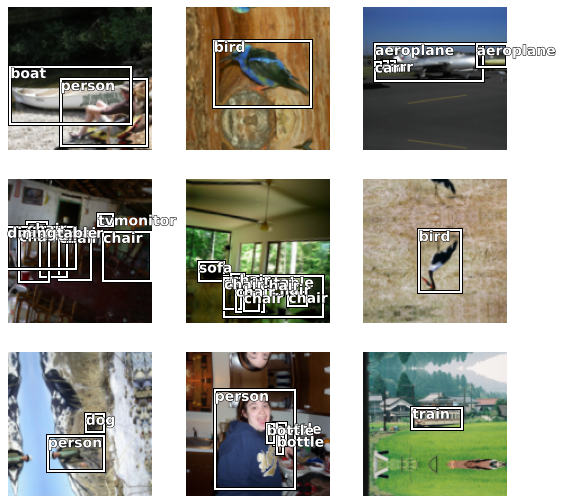

In [26]:
dls.show_batch()

# The Model

The architecture we are going to use is called `RetinaNet`. I've exported this all myself for you guys to use quickly, if you want to explore what's going on in the code I'd recommend the Object Detection lesson [here](https://www.youtube.com/watch?v=Z0ssNAbe81M&t=4496s)

jeremy howard 2018 ..
https://www.youtube.com/watch?v=Z0ssNAbe81M&t=4496s


Let's import it:

In [27]:
from wwf.vision.object_detection import *

We're still going to use transfer learning here by creating an `encoder` (body) of our model and a head

In [28]:
encoder = create_body(resnet34, pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

Now that we have our encoder, we can call the `RetinaNet` architecture. We'll pass in the encoder, the number of classes, and what we want our final bias to be on the last convolutional layer (how we initialize our model). Jeremy has his example at -4 so let's use this

In [29]:
get_c(dls)

20

In [30]:
arch = RetinaNet(encoder, get_c(dls), final_bias=-4)

Another big difference is the head of our model. Instead of our linear layers with pooling layers:

In [31]:
create_head(124, 4)

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(248, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=248, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=4, bias=False)
)

We have one with a smoother, a classifer, and a `box_regressor` (to get our points)

In [32]:
arch.smoothers

ModuleList(
  (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [33]:
arch.classifier

Sequential(
  (0): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (1): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (2): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (3): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (4): Conv2d(256, 180, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

In [34]:
arch.box_regressor

Sequential(
  (0): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (1): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (2): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (3): ConvLayer(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
  )
  (4): Conv2d(256, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
)

## Loss Function
Now we can move onto our loss function. For RetinaNet to work, we need to define what the aspect ratio's and scales of our image should be. The paper used [1,2**(1/3), 2**(2/3)], but they also used an image size of 600 pixels, so even the largest feature map (box) gave anchors that covered less than the image. But for us it would go over. As such we will use -1/3 and -2/3 instead. We will need these for inference later!

In [35]:
ratios = [1/2,1,2]
scales = [1,2**(-1/3), 2**(-2/3)]

Let's make our loss function, which is `RetinaNetFocalLoss`

In [36]:
crit = RetinaNetFocalLoss(scales=scales, ratios=ratios)

Now let's make our `Learner`!

We want to freeze our `encoder` and keep everything else unfrozen to start

In [37]:
def _retinanet_split(m): return L(m.encoder,nn.Sequential(m.c5top6, m.p6top7, m.merges, m.smoothers, m.classifier, m.box_regressor)).map(params)

In [38]:
learn = Learner(dls, arch, loss_func=crit, splitter=_retinanet_split)

In [39]:
learn.freeze()

Now let's train!

In [ ]:
learn.fit_one_cycle(10, slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,time
0,3.262614,2.901130,29:06
1,2.857219,2.565259,30:37
2,2.667142,2.665304,29:51
3,2.581056,2.357712,29:14
4,2.489318,2.406975,30:13
5,2.409918,2.492287,28:32
6,2.339078,2.529333,30:31
7,2.284573,2.482393,29:43


## Word of Warning:

`show_results` and `predict` both do not currently work. I'd recommend utilizing the [IceVision](https://github.com/airctic/icevision) library for your Object Detection needs.